In [83]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier 
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import roc_curve, RocCurveDisplay, roc_auc_score
from sklearn.model_selection import StratifiedKFold, cross_val_score 
from sklearn.metrics import roc_curve, auc
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay

In [65]:
#Importation and Loading of Datasets
df = pd.read_csv('healthcare-dataset-stroke-data.csv', index_col=0)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# DATA EXPLORATION
The dataset contains a combination of categorical and numerical features, such as ID, Age, gender, Heart_disease and BMI, among others.

In [3]:
#Preview the dataseat (Displaying the top 15 rows of the data set)
df.head(15)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1


In [4]:
#(Displaying the top 15 rows of the data set)
df.tail(15)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
68598,Male,1.08,0,0,No,children,Rural,79.15,17.4,Unknown,0
41512,Male,57.00,0,0,Yes,Govt_job,Rural,76.62,28.2,never smoked,0
64520,Male,68.00,0,0,Yes,Self-employed,Urban,91.68,40.8,Unknown,0
579,Male,9.00,0,0,No,children,Urban,71.88,17.5,Unknown,0
7293,Male,40.00,0,0,Yes,Private,Rural,83.94,NaN,smokes,0
68398,Male,82.00,1,0,Yes,Self-employed,Rural,71.97,28.3,never smoked,0
36901,Female,45.00,0,0,Yes,Private,Urban,97.95,24.5,Unknown,0
45010,Female,57.00,0,0,Yes,Private,Rural,77.93,21.7,never smoked,0
22127,Female,18.00,0,0,No,Private,Urban,82.85,46.9,Unknown,0


In [5]:
#This is Checking the size of the dataset
df.size

56210

In [6]:
#This is checking the shape of the dataset
df.shape

(5110, 11)

In [7]:
#This is used when you want to check if a DataFrame is empty before performing operations on it.
df.empty

False

In [8]:
# Basic info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5110 entries, 9046 to 44679
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 479.1+ KB


In [9]:
# Descriptive statistics for numerical features
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


# DATA PREPROCESSING (PREPARATION)
This is a crucial step in the machine learning pipeline that involves preparing raw data for analysis and modeling.

In [10]:
#This shows the list of the columns in the dataset
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [11]:
# This is use to check for duplicate rows in a DataFrame, and sum() is used to count how many of those duplicate rows exist.
df.duplicated().sum()

0

In [12]:
# Checking for missing values
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [13]:
#This shows Columns with missing values
missing_columns = [col for col in df.columns if df[col].isnull().sum() > 0]
missing_columns

['bmi']

In [14]:
#This calculates the percentage of missing values in each column of a pandas DataFrame, and then formats the result as a percentage.
missing_perc = (df.isnull().mean() * 100).round(2)
print(missing_perc.apply(lambda x: f"{x}%"))

gender                0.0%
age                   0.0%
hypertension          0.0%
heart_disease         0.0%
ever_married          0.0%
work_type             0.0%
Residence_type        0.0%
avg_glucose_level     0.0%
bmi                  3.93%
smoking_status        0.0%
stroke                0.0%
dtype: object


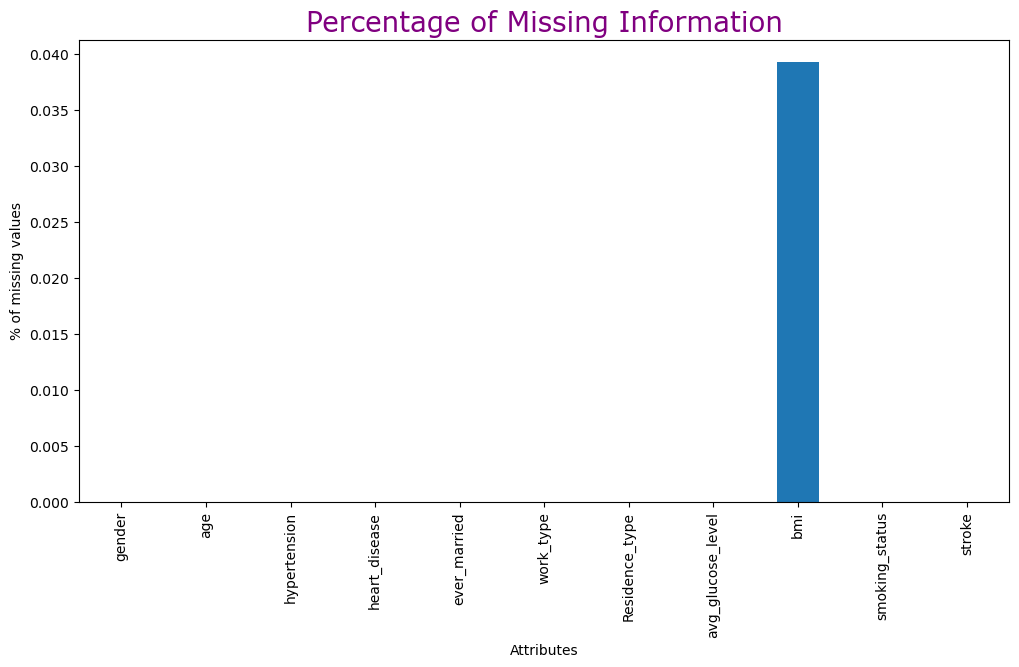

In [15]:
#plotting missing values in percentages
df.isnull().mean().plot.bar(figsize=(12,6))
plt.ylabel('% of missing values')
plt.xlabel('Attributes')
plt.title('Percentage of Missing Information', color='Purple',font='Verdana', fontsize=20);

# FILLING MISSING VALUES IN THE BMI

In [16]:
# Impute missing values in the 'bmi' column with the median
df['bmi'].fillna(df['bmi'].median(), inplace=True)

# Verify if missing values are handled
missing_values_after = df.isnull().sum()
print("Missing values after handling:")
print(missing_values_after)



Missing values after handling:
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


In [17]:
#This has two unique values which are Benign (B) and Malignant (M)
df['stroke'].unique()

array([1, 0], dtype=int64)

# we have 2 unique values in the output variable which is 1 (means the patient is likely to have stroke due to their lifestyle) and 0 (means not likely to have stroke becaus of their lifestyle) EXPLORATORY DATA ANALYSIS

# Exploratory Data Analysis (EDA)
It helps you understand the data, detect anomalies, test assumptions, and check the underlying structure before proceeding with any modeling or analysis.

In [18]:
# Check unique values in categorical columns
try:
    cat_cols = cat  
except NameError:
    cat_cols = df.select_dtypes(include=['object','category']).columns

print("Categorical columns and their unique value counts:")
for col in cat_cols:
    print(f"{col} has: {df[col].nunique()} unique values -> {df[col].unique()}")

Categorical columns and their unique value counts:
gender has: 3 unique values -> ['Male' 'Female' 'Other']
ever_married has: 2 unique values -> ['Yes' 'No']
work_type has: 5 unique values -> ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Residence_type has: 2 unique values -> ['Urban' 'Rural']
smoking_status has: 4 unique values -> ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


# The above shows the catogorical values that will be transformed to numerical data for training.

In [19]:
stroke = df['stroke'].value_counts()
print(stroke)
print("Percentage of patience to develop Stroke (1): "+str(round(stroke[1]*100/5110,2)) +" %")
print("Percentage of patience not to develop Stroke (0): "+str(round(stroke[0]*100/5110,2))+ " %")

0    4861
1     249
Name: stroke, dtype: int64
Percentage of patience to develop Stroke (1): 4.87 %
Percentage of patience not to develop Stroke (0): 95.13 %


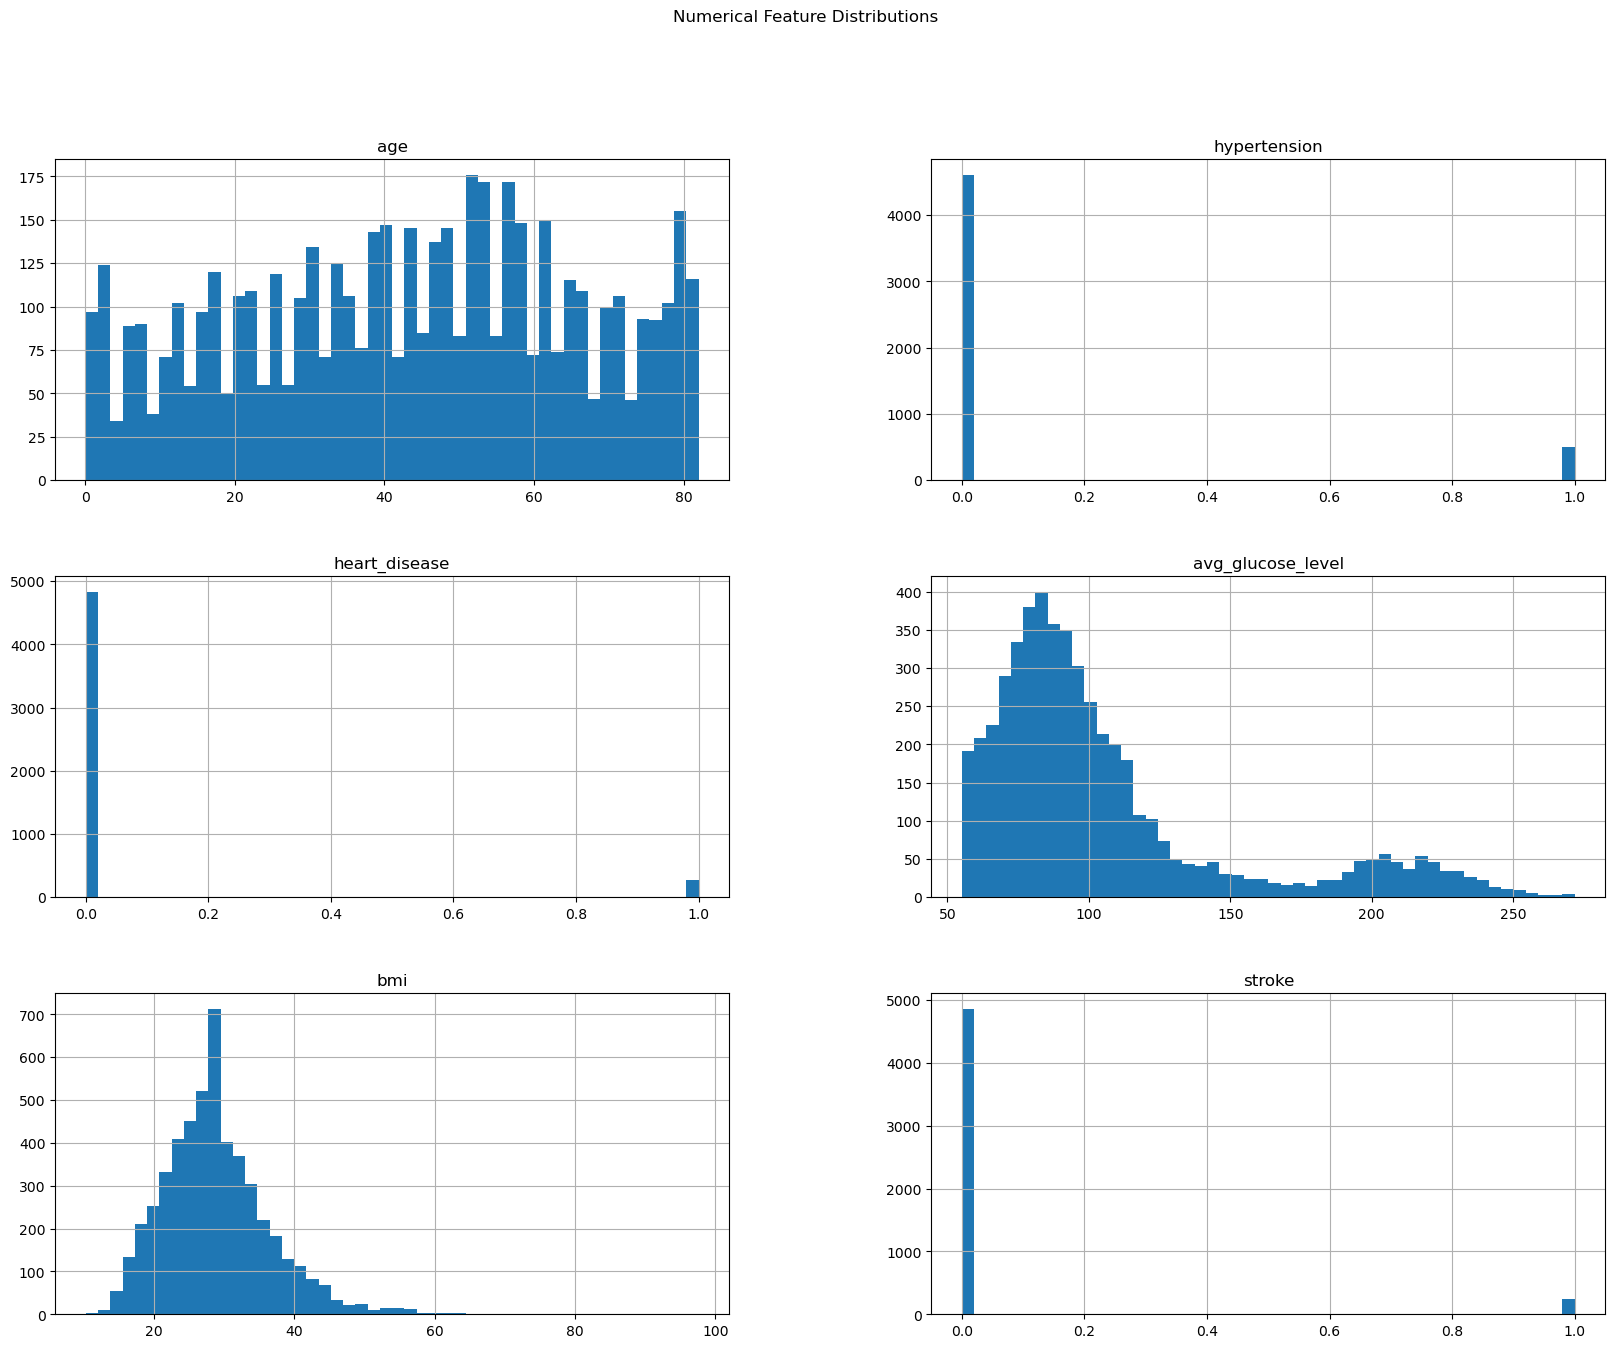

In [20]:
#Numerical Feature Distributions Plot
num_cols = df.select_dtypes(include=np.number).columns
df[num_cols].hist(figsize=(20,15), bins=50)
plt.suptitle("Numerical Feature Distributions")
plt.show()


In [21]:
#This Selects all columns that contain categorical (text) data.and Extracts the column names of these categorical columns.
cat = df.select_dtypes(include='object').columns
len(cat) #Counts how many categorical columns exist.


5

In [22]:
#Checking for the unique values in the numerical column
for i in cat:
    print("The no.of unique values in",i,"are: ",df.loc[:,i].nunique())

The no.of unique values in gender are:  3
The no.of unique values in ever_married are:  2
The no.of unique values in work_type are:  5
The no.of unique values in Residence_type are:  2
The no.of unique values in smoking_status are:  4


# Univariate Analysis

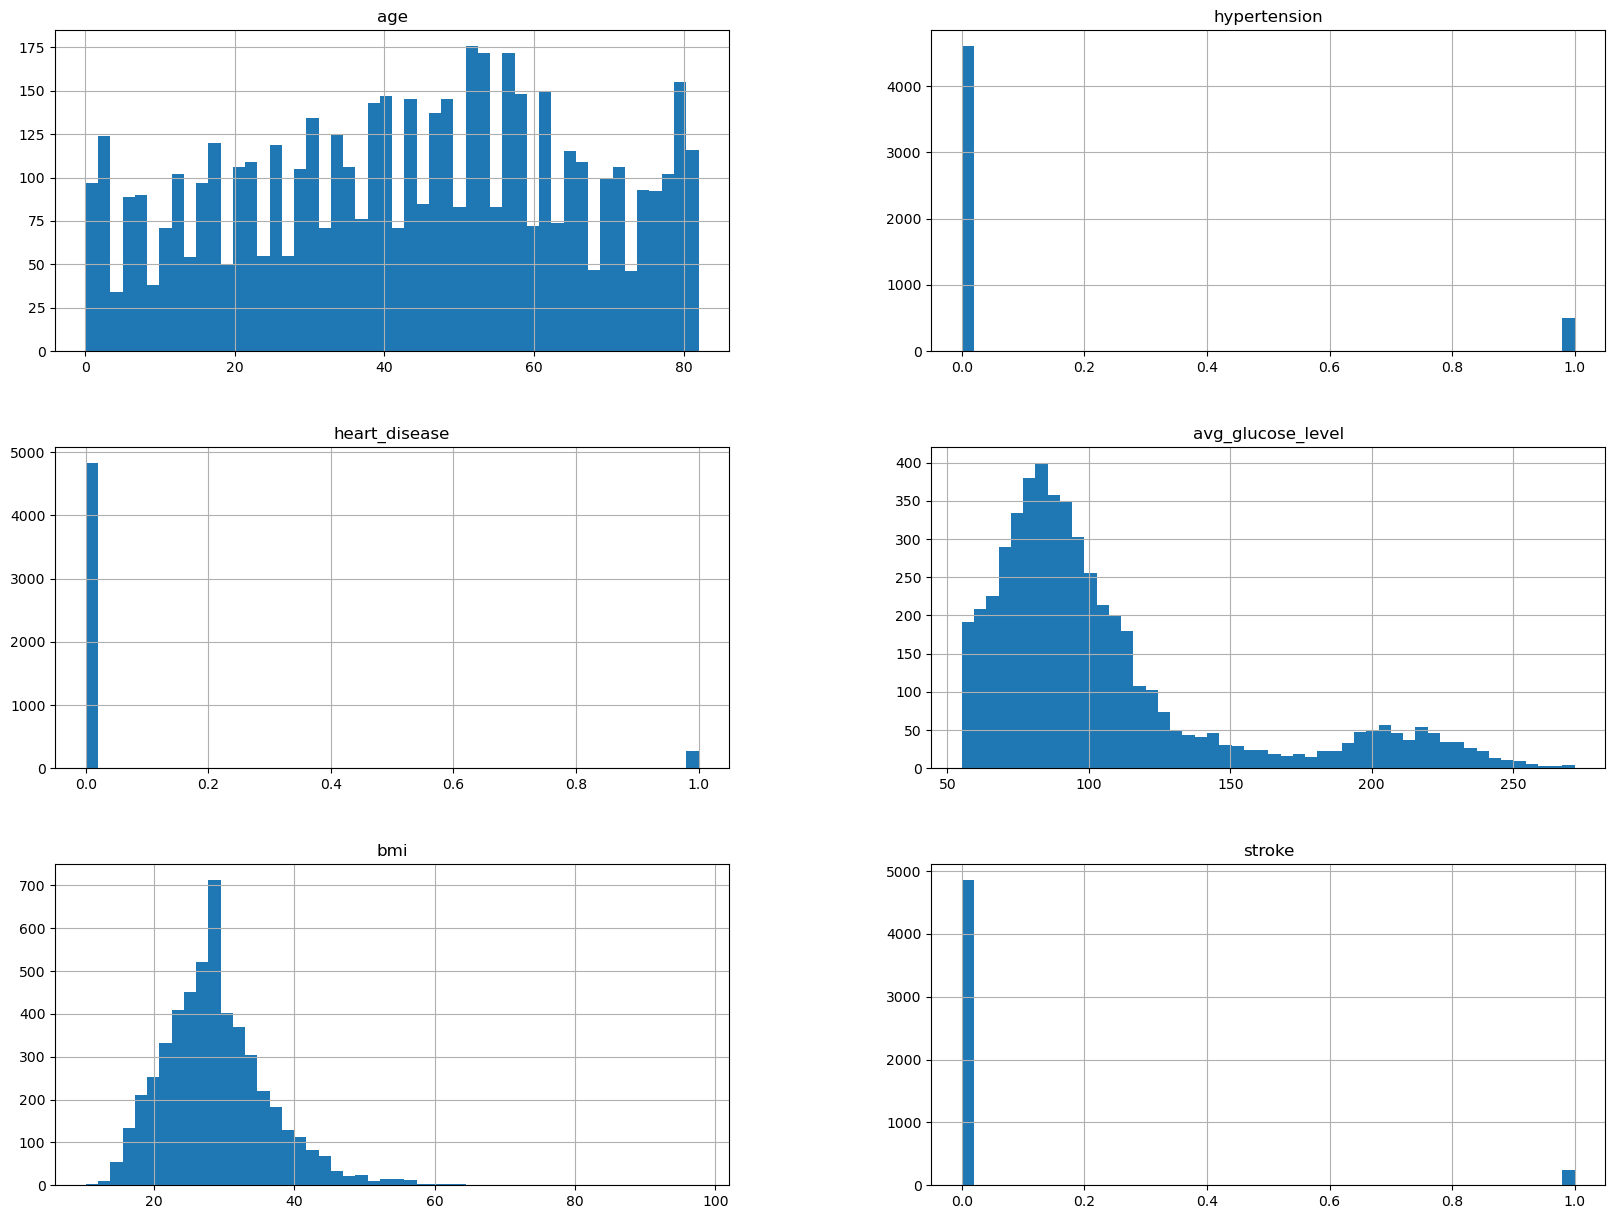

In [23]:
# visualizing the distribution of our numerical columns
df.hist(bins=50, figsize=(20,15))
plt.show()

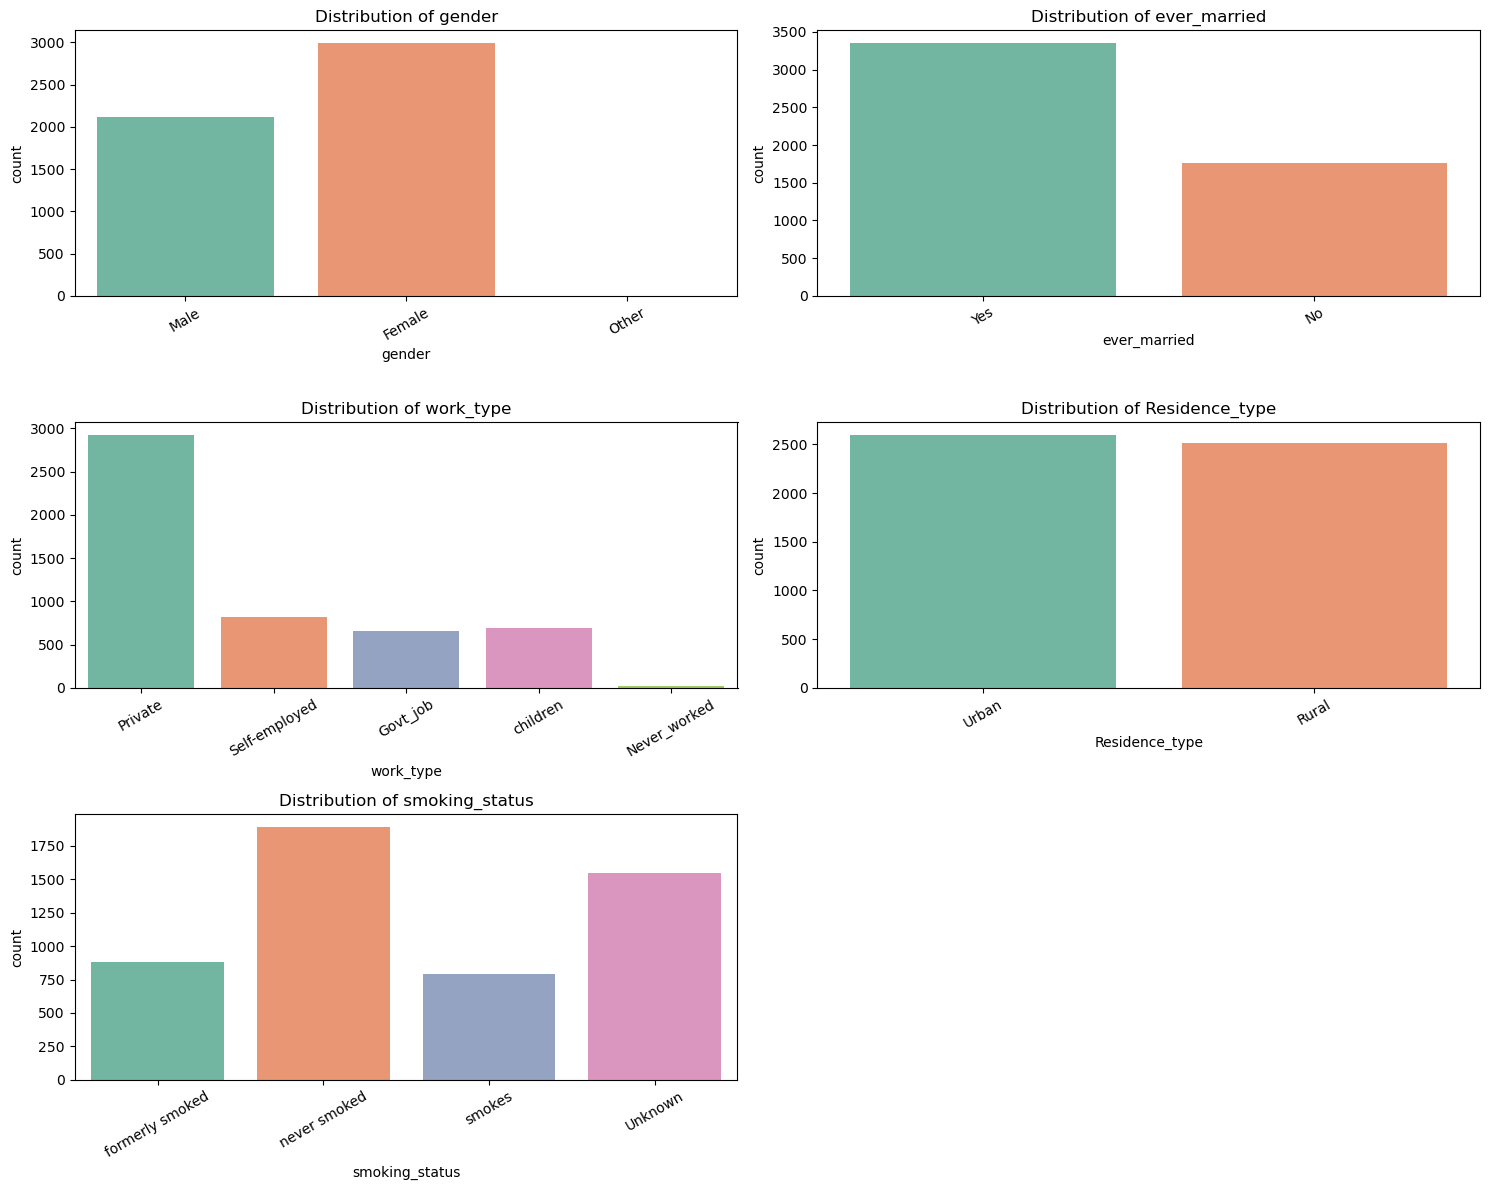

In [24]:
cat_cols = df.select_dtypes(include='object').columns
plt.figure(figsize=(15, 12))

for idx, col in enumerate(cat_cols, 1):
    plt.subplot(3, 2, idx)
    sns.countplot(data=df, x=col, palette='Set2')
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=30)

plt.tight_layout()
plt.show()

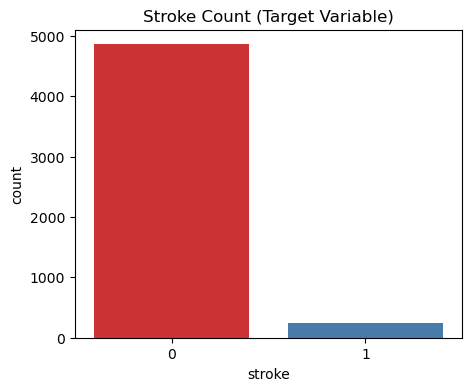

0    95.127202
1     4.872798
Name: stroke, dtype: float64


In [25]:
plt.figure(figsize=(5,4))
sns.countplot(data=df, x='stroke', palette='Set1')
plt.title('Stroke Count (Target Variable)')
plt.show()

# Percentage
stroke_counts = df['stroke'].value_counts(normalize=True) * 100
print(stroke_counts)

# Bivarate Analysis

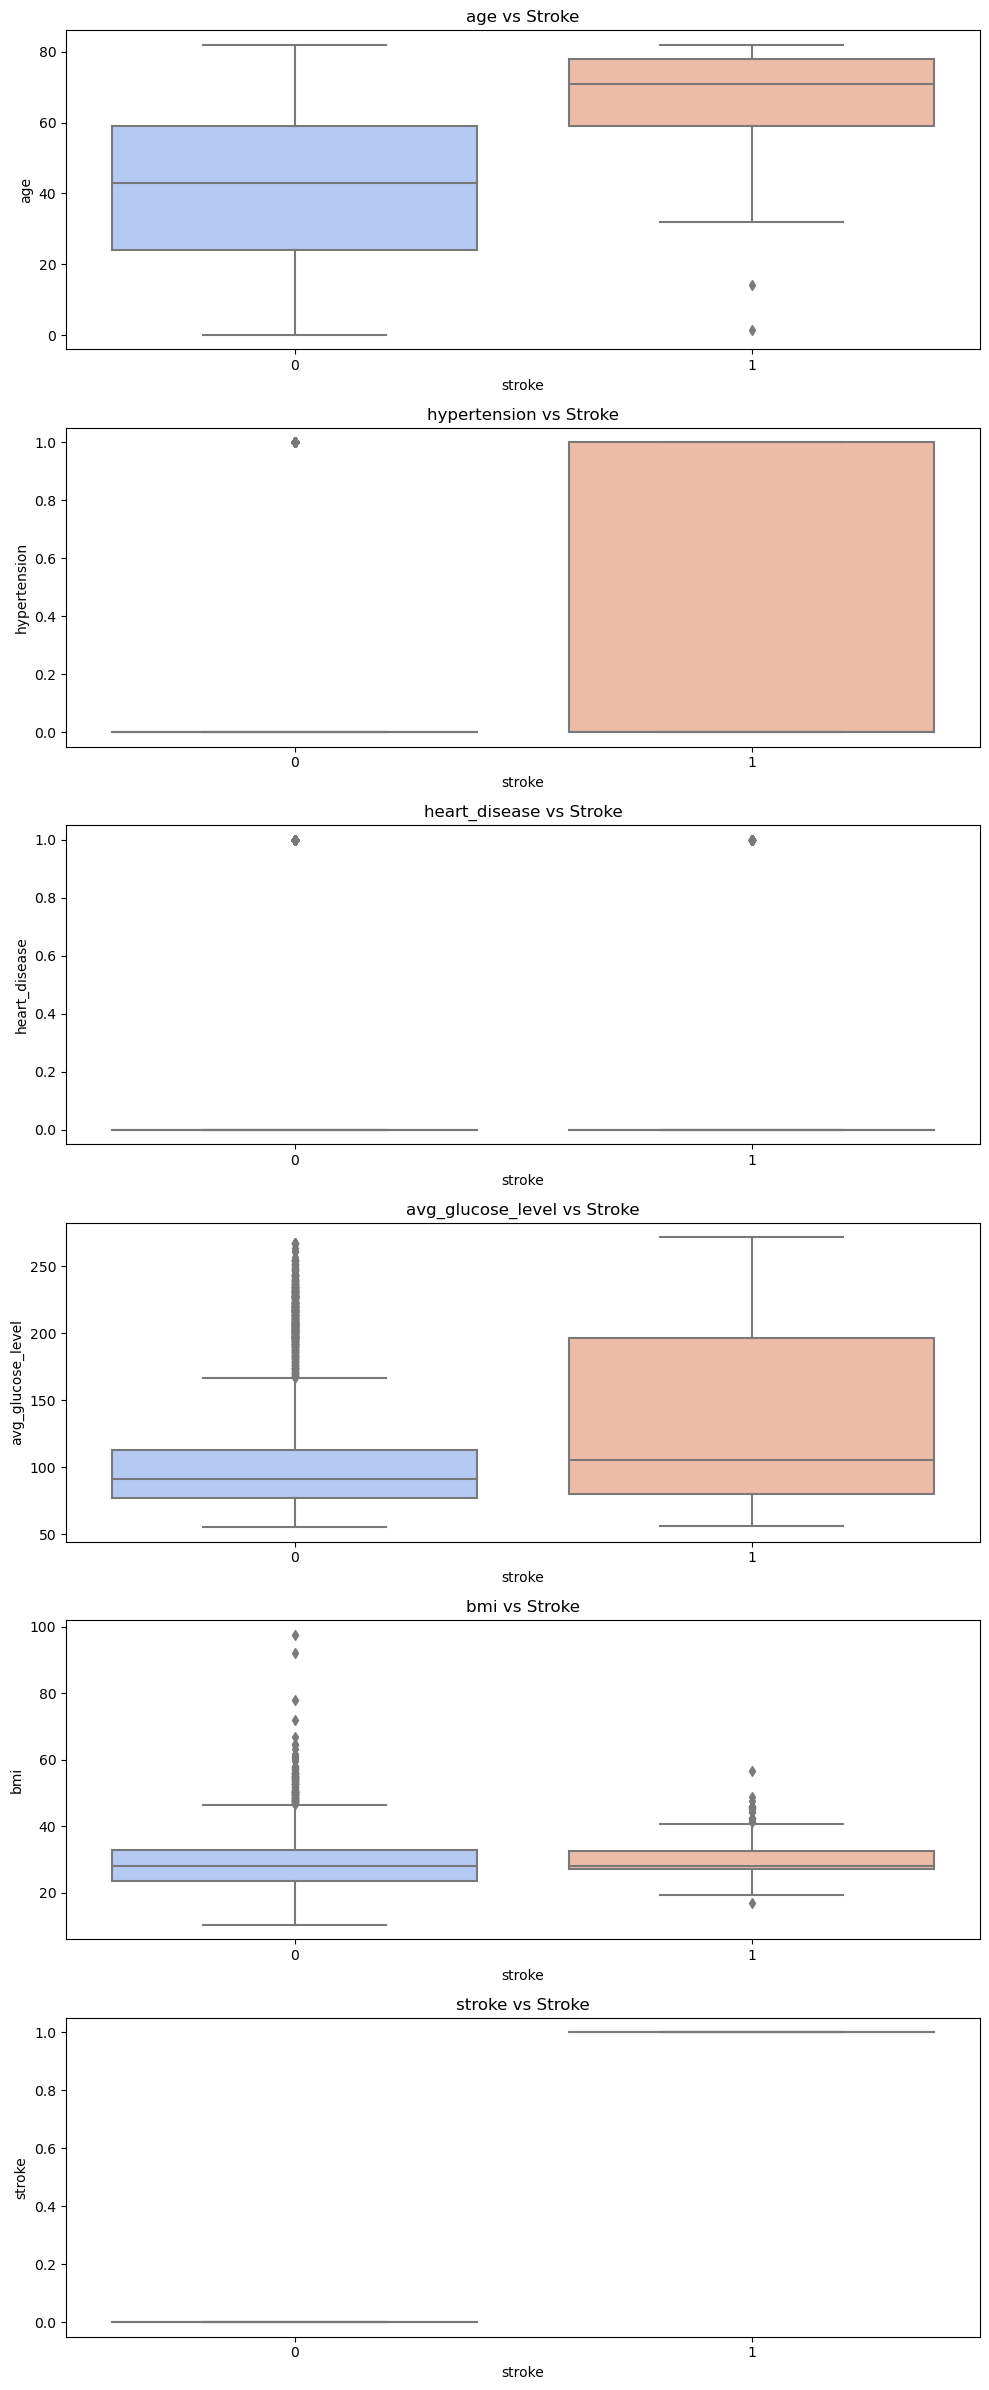

In [26]:
# Select numeric features excluding 'id' and 'stroke'
num_cols = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']

fig, axes = plt.subplots(nrows=len(num_cols), ncols=1, figsize=(10, 4*len(num_cols)))
axes = axes.flatten()

for idx, col in enumerate(num_cols):
    sns.boxplot(data=df, x='stroke', y=col, palette='coolwarm', ax=axes[idx])
    axes[idx].set_title(f'{col} vs Stroke')

plt.tight_layout()
plt.show()



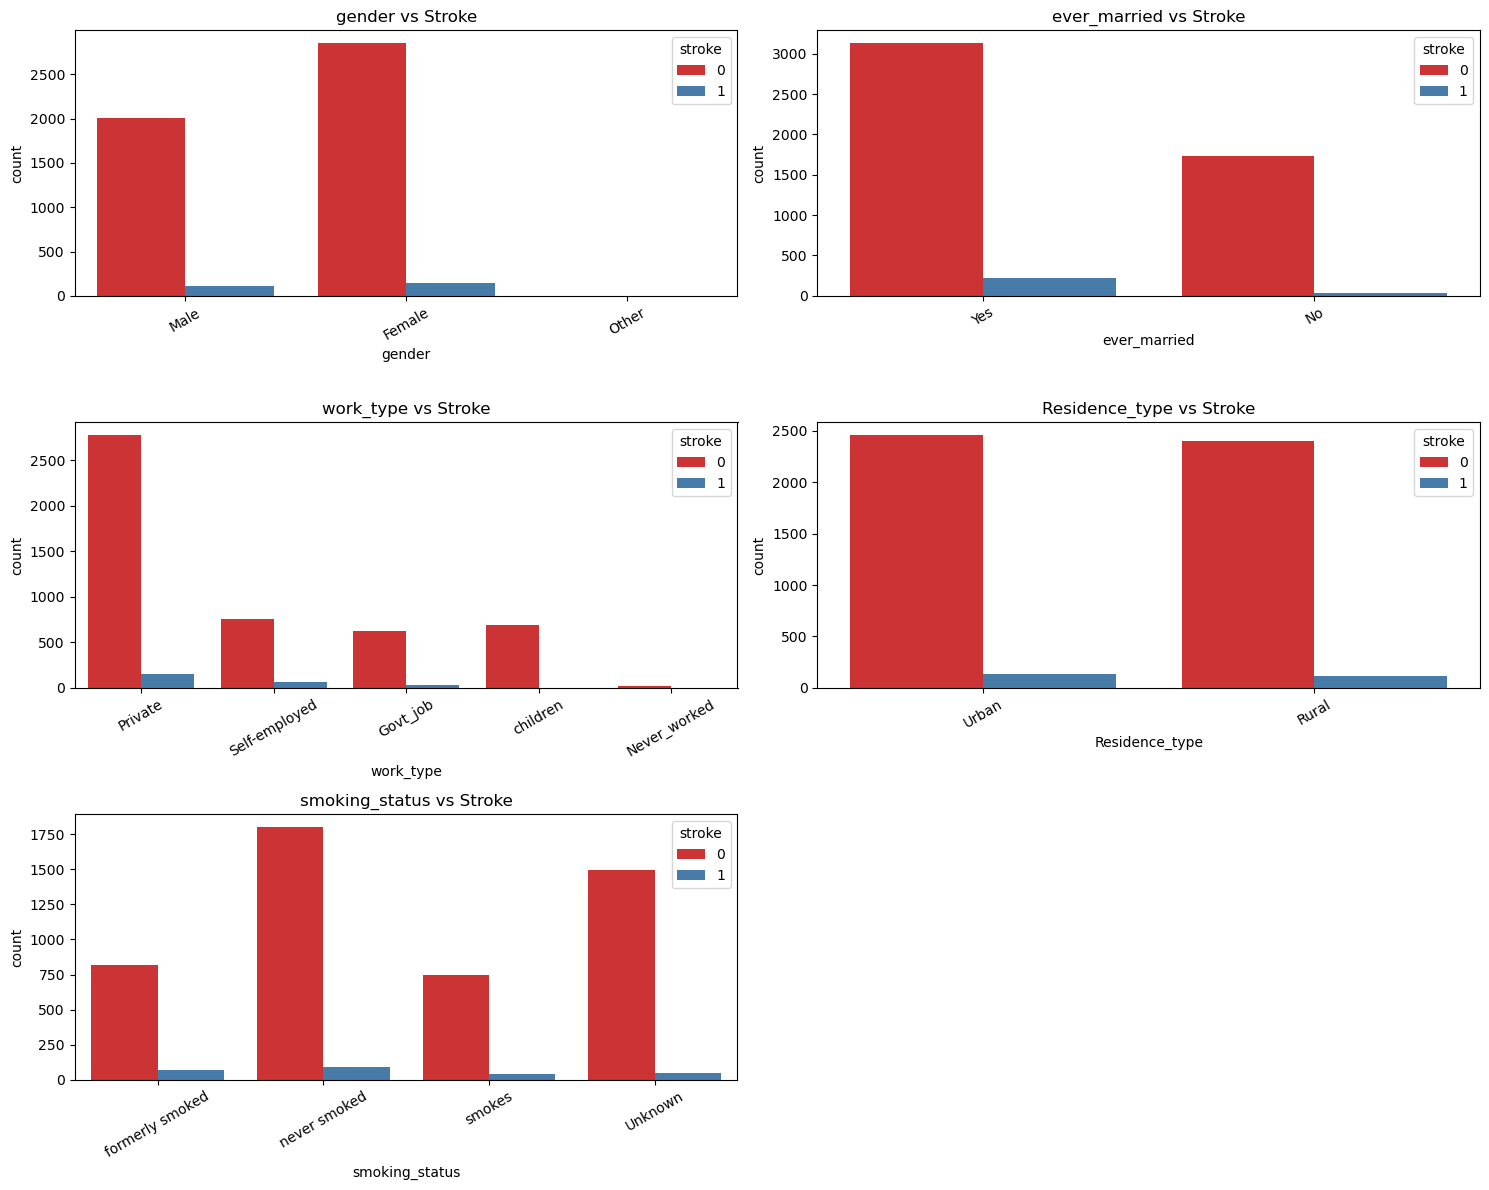

In [27]:
plt.figure(figsize=(15, 12))

for idx, col in enumerate(cat_cols, 1):
    plt.subplot(3, 2, idx)
    sns.countplot(data=df, x=col, hue='stroke', palette='Set1')
    plt.title(f'{col} vs Stroke')
    plt.xticks(rotation=30)

plt.tight_layout()
plt.show()

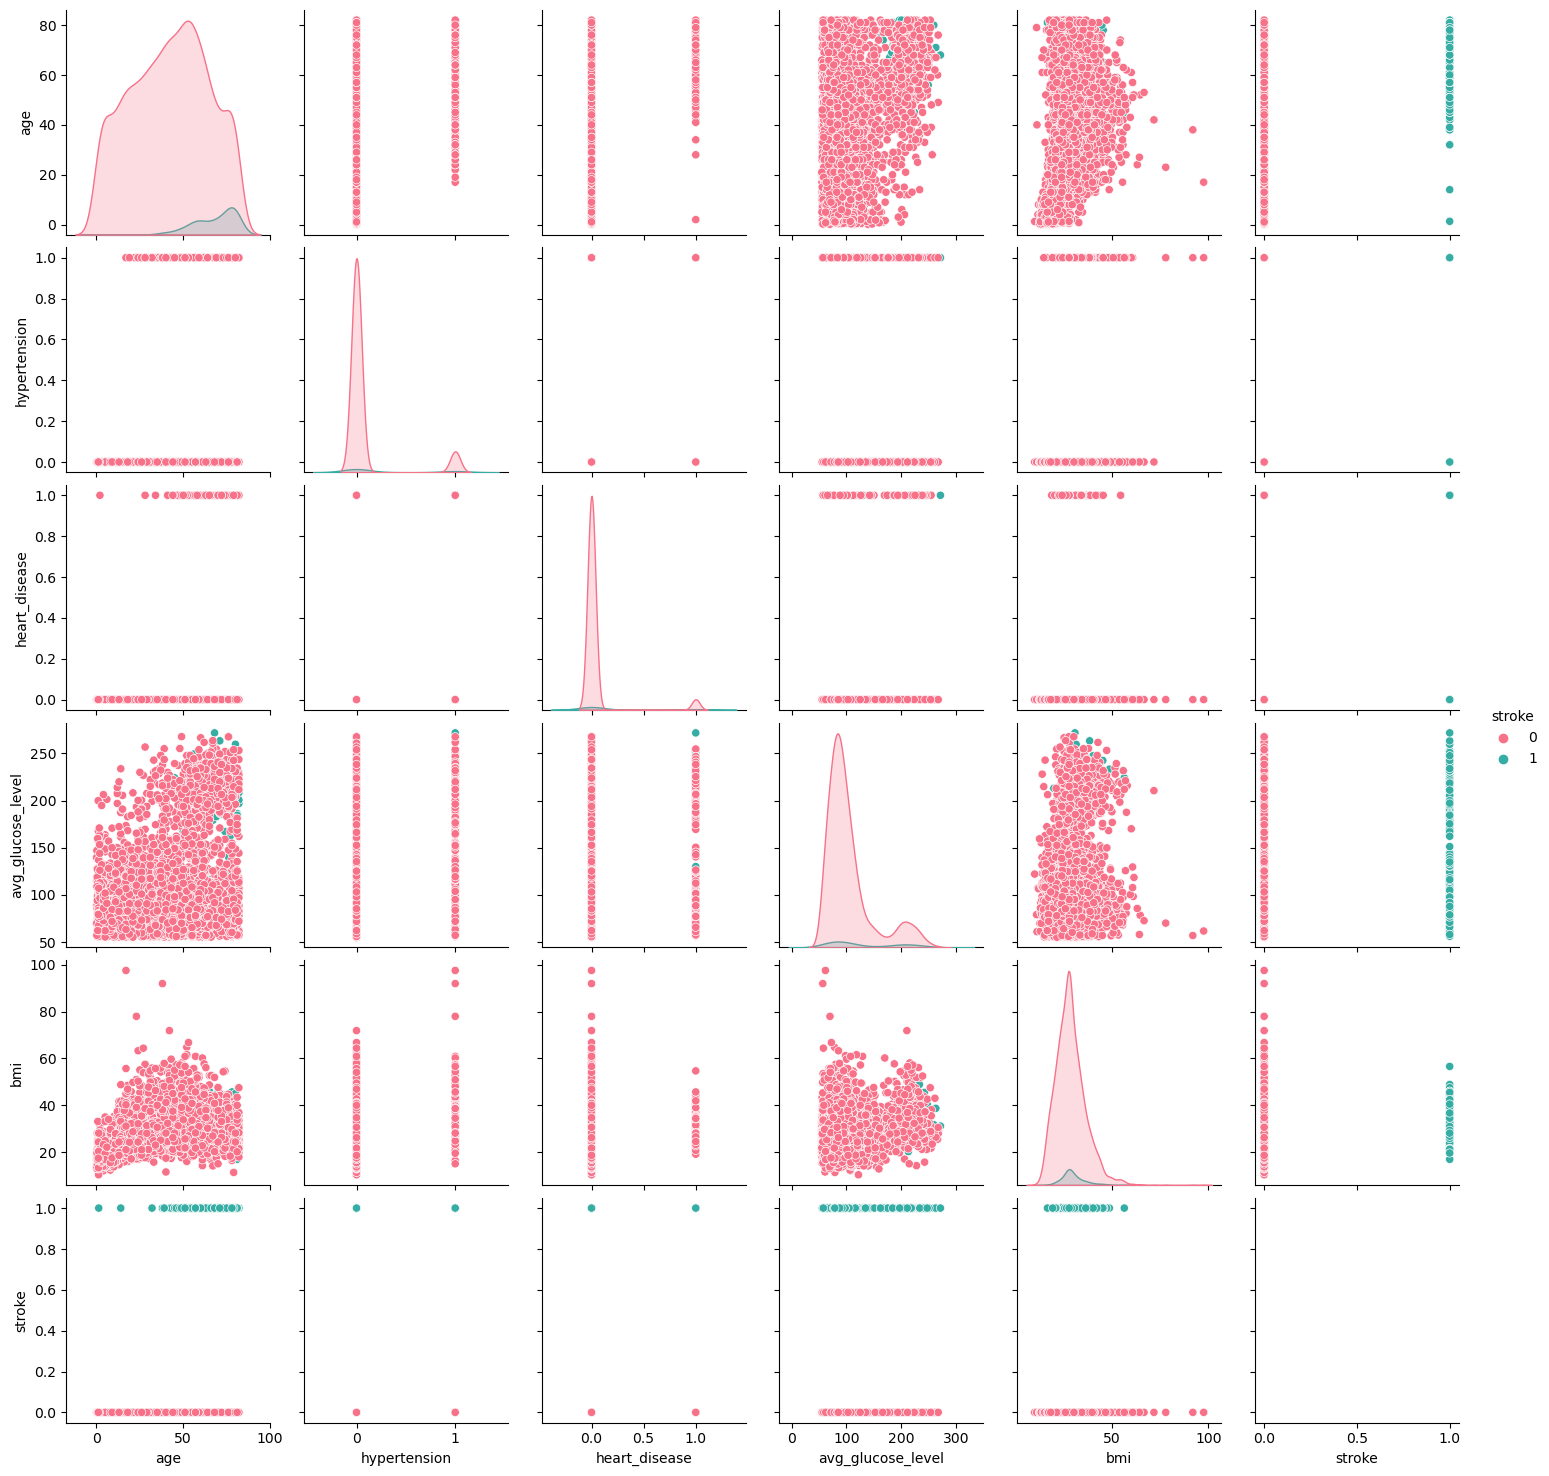

In [28]:
# Pairplot (Numerical Features vs Target)
sns.pairplot(df, vars=num_cols, hue='stroke', palette='husl')
plt.show()

Text(0.5, 1.0, 'Stroke Occurrence by Age Group')

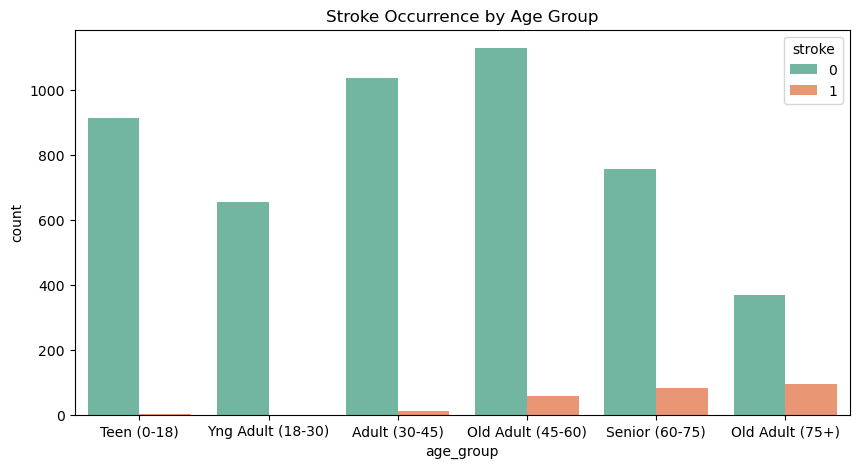

In [29]:
## Distribution by Age Groups
dfage = df.copy()
dfage['age_group'] = pd.cut(dfage['age'], bins=[0,18,30,45,60,75,100],
                         labels=['Teen (0-18)','Yng Adult (18-30)','Adult (30-45)','Old Adult (45-60)','Senior (60-75)','Old Adult (75+)'])

plt.figure(figsize=(10,5))
sns.countplot(data=dfage, x='age_group', hue='stroke', palette='Set2')
plt.title('Stroke Occurrence by Age Group')

# FEATURE ENGINEERING
Outlier Removal by setting the upper and lower quatiles

Numerical columns for outlier detection: ['age', 'avg_glucose_level', 'bmi']

Column: age
Lower bound: -29.00, Upper bound: 115.00
Number of outliers: 0

Column: avg_glucose_level
Lower bound: 21.98, Upper bound: 169.36
Number of outliers: 627

Column: bmi
Lower bound: 9.95, Upper bound: 45.55
Number of outliers: 100

Total rows before: 5110
Total rows after removing outliers: 4383
Number of rows removed: 727


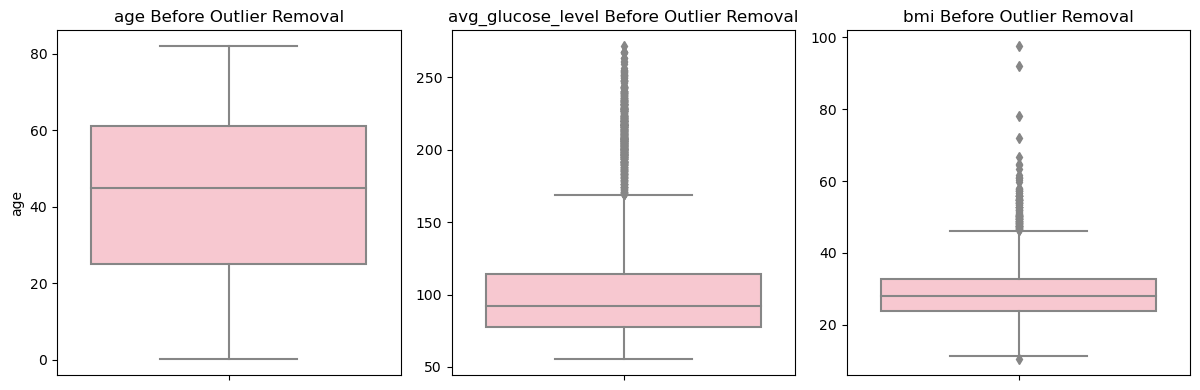

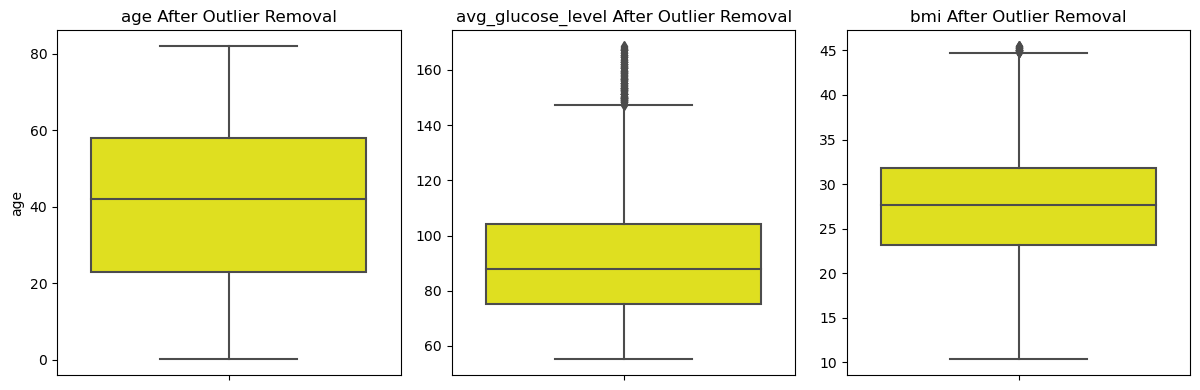

Cleaned dataset saved as 'stroke_new.csv'


In [30]:
if 'id' in df.columns:
    data = df.drop(columns=['id'])
if 'stroke' in df.columns:
    data_numeric = df.drop(columns=['stroke'])
else:
    data_numeric = data

# Select numerical columns for outlier detection
numerical_cols = num_cols = ["age", "avg_glucose_level", "bmi"]
print(f"Numerical columns for outlier detection: {numerical_cols}")

custom_palette = ['pink']
custom_palette1 = ['yellow']
# Function to detect and remove outliers using IQR method
def remove_outliers_iqr(df, column, multiplier=1.5):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR
    
    # Identify outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    print(f"\nColumn: {column}")
    print(f"Lower bound: {lower_bound:.2f}, Upper bound: {upper_bound:.2f}")
    print(f"Number of outliers: {len(outliers)}")
    #print(f"Outlier values:\n{outliers}")
    
    # Remove outliers
    df_cleaned = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_cleaned, outliers

# Initialize the cleaned dataset
data_cleaned = df.copy()

# Apply outlier removal to each numerical column
for col in numerical_cols:
    data_cleaned, outliers = remove_outliers_iqr(data_cleaned, col, multiplier=1.5)

# Display the number of rows removed
rows_removed = len(df) - len(data_cleaned)
print(f"\nTotal rows before: {len(df)}")
print(f"Total rows after removing outliers: {len(data_cleaned)}")
print(f"Number of rows removed: {rows_removed}")

# --- Visualization: Box Plots Before and After for All Features in 5 Columns ---
# Before removal
n_cols = 5
n_rows_before = (len(numerical_cols) + n_cols - 1) // n_cols  # Dynamic rows based on number of columns
plt.figure(figsize=(20, 4 * n_rows_before))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(n_rows_before, n_cols, i)
    sns.boxplot(data=df, y=col, palette=custom_palette)
    plt.title(f'{col} Before Outlier Removal')
    plt.ylabel(col if i % n_cols == 1 else '')  # Label only the first column of each row

plt.tight_layout()
plt.show()
# After removal
n_rows_after = (len(numerical_cols) + n_cols - 1) // n_cols  # Dynamic rows based on number of columns
plt.figure(figsize=(20, 4 * n_rows_after))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(n_rows_after, n_cols, i)
    sns.boxplot(data=data_cleaned, y=col, palette=custom_palette1)
    plt.title(f'{col} After Outlier Removal')
    plt.ylabel(col if i % n_cols == 1 else '')  # Label only the first column of each row

plt.tight_layout()
plt.show()

# Save the cleaned dataset
data_cleaned.to_csv('stroke_new.csv', index=False)
print("Cleaned dataset saved as 'stroke_new.csv'")

# The New Datasets with ouliers removed is saved as stroke_new.csv which is reopened in the next line of code.

In [31]:
df = pd.read_csv('stroke_new.csv')
df.shape

(4383, 11)

In [32]:
df.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
1,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
2,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
3,Female,59.0,0,0,Yes,Private,Rural,76.15,28.1,Unknown,1
4,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1
5,Female,81.0,1,0,Yes,Private,Rural,80.43,29.7,never smoked,1
6,Female,61.0,0,1,Yes,Govt_job,Rural,120.46,36.8,smokes,1
7,Female,54.0,0,0,Yes,Private,Urban,104.51,27.3,smokes,1
8,Female,50.0,1,0,Yes,Self-employed,Rural,167.41,30.9,never smoked,1
9,Female,60.0,0,0,No,Private,Urban,89.22,37.8,never smoked,1


# Correlation Analysis

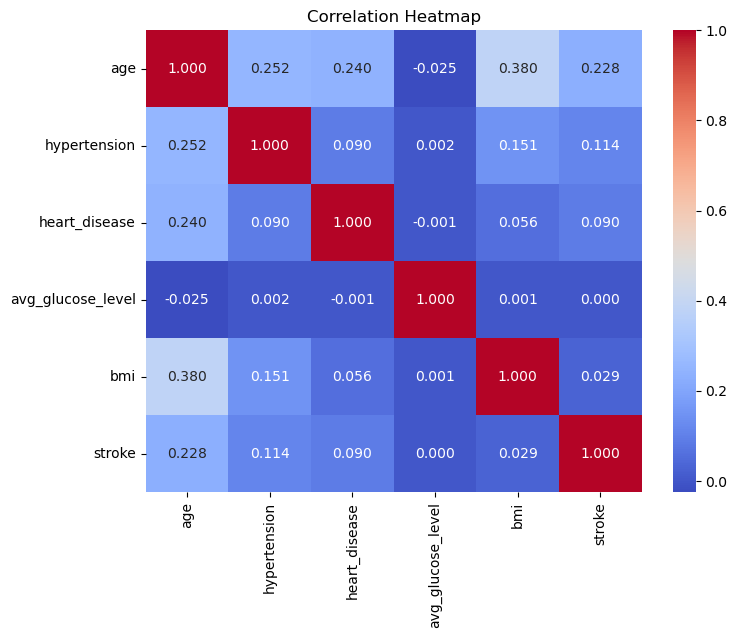

In [33]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".3f")
plt.title('Correlation Heatmap')
plt.show()

In [34]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
1,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
2,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
3,Female,59.0,0,0,Yes,Private,Rural,76.15,28.1,Unknown,1
4,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


# ENCODING

In [35]:
# Start from the original dataframe (before wrong encoding)


# Proper encoding of all categorical columns
# 1. Binary columns → Label Encoding (0/1)
df['gender'] = df['gender'].map({'Male': 1, 'Female': 0, 'Other': 1})  # 'Other' is rare
df['ever_married'] = df['ever_married'].map({'Yes': 1, 'No': 0})
df['Residence_type'] = df['Residence_type'].map({'Urban': 1, 'Rural': 0})

# 2. work_type & smoking_status → One-Hot Encoding
df_final = pd.get_dummies(df, 
                          columns=['work_type', 'smoking_status'],
                          prefix=['work', 'smoking'],
                          drop_first=True)

print("Final shape:", df_final.shape)
print("Columns after encoding:")
print(df_final.columns.tolist())

df_final.head()

Final shape: (4383, 16)
Columns after encoding:
['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'Residence_type', 'avg_glucose_level', 'bmi', 'stroke', 'work_Never_worked', 'work_Private', 'work_Self-employed', 'work_children', 'smoking_formerly smoked', 'smoking_never smoked', 'smoking_smokes']


,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_Never_worked,work_Private,work_Self-employed,work_children,smoking_formerly smoked,smoking_never smoked,smoking_smokes
0,1,80.0,0,1,1,0,105.92,32.5,1,0,1,0,0,0,1,0
1,1,74.0,1,1,1,0,70.09,27.4,1,0,1,0,0,0,1,0
2,0,69.0,0,0,0,1,94.39,22.8,1,0,1,0,0,0,1,0
3,0,59.0,0,0,1,0,76.15,28.1,1,0,1,0,0,0,0,0
4,0,78.0,0,0,1,1,58.57,24.2,1,0,1,0,0,0,0,0


In [36]:
df_final.head(1000)

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_Never_worked,work_Private,work_Self-employed,work_children,smoking_formerly smoked,smoking_never smoked,smoking_smokes
0,1,80.0,0,1,1,0,105.92,32.5,1,0,1,0,0,0,1,0
1,1,74.0,1,1,1,0,70.09,27.4,1,0,1,0,0,0,1,0
2,0,69.0,0,0,0,1,94.39,22.8,1,0,1,0,0,0,1,0
3,0,59.0,0,0,1,0,76.15,28.1,1,0,1,0,0,0,0,0
4,0,78.0,0,0,1,1,58.57,24.2,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,41.0,0,0,1,0,107.18,22.8,0,0,1,0,0,0,1,0
996,1,37.0,0,0,1,0,74.58,31.6,0,0,1,0,0,0,0,0
997,0,58.0,0,0,1,1,80.92,19.4,0,0,1,0,0,0,0,0
998,0,79.0,0,0,1,0,90.77,22.5,0,0,1,0,0,0,1,0


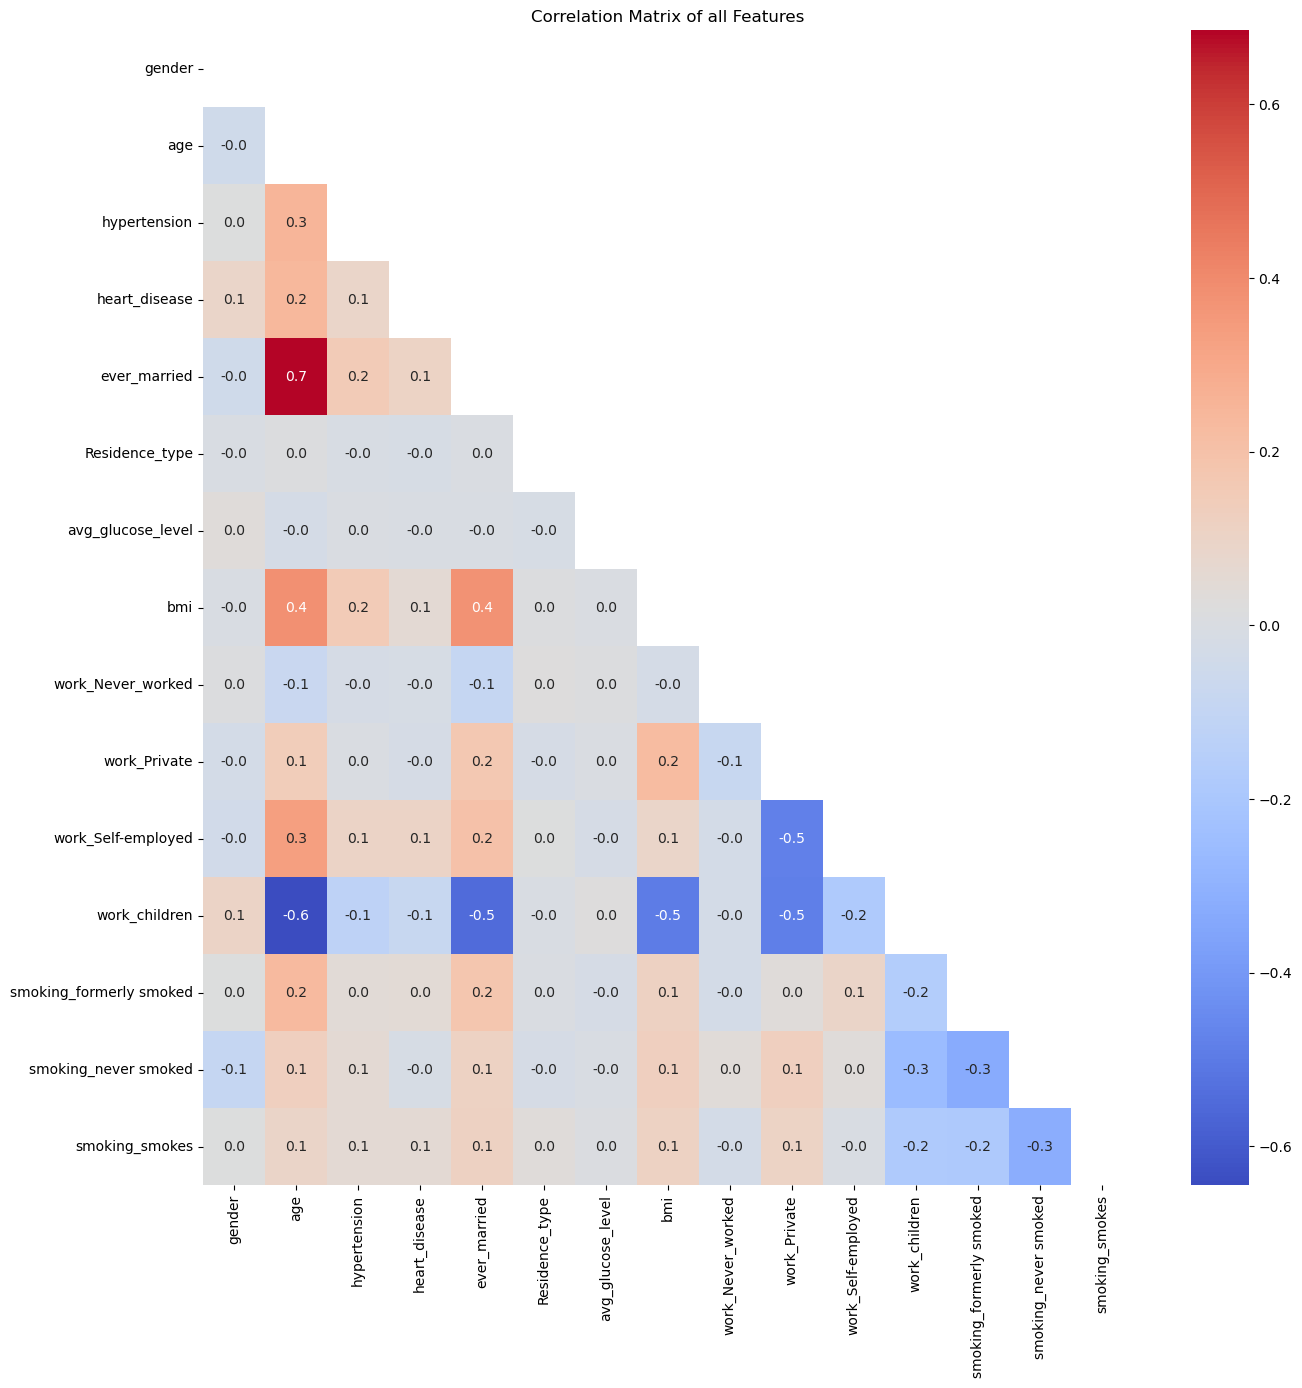

In [37]:
plt.figure(figsize=(15, 15))
sns.heatmap(df_final.drop(columns=['stroke'], errors='ignore').corr(), cmap='coolwarm', annot=True, fmt='.1f', cbar=True, mask=np.triu(np.ones_like(df_final.drop(columns=['stroke'], errors='ignore').corr(), dtype=bool)))
plt.title("Correlation Matrix of all Features")
plt.show()

In [38]:
X = df_final.drop('stroke', axis=1)
y = df_final['stroke']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    random_state=42,
    stratify=y,           # ← very important with 95/5 imbalance
    shuffle=True
)

print(f"Train: {X_train.shape}  |  Positive ratio: {y_train.mean():.3f}")
print(f"Test : {X_test.shape}   |  Positive ratio: {y_test.mean():.3f}")

Train: (3506, 15)  |  Positive ratio: 0.037
Test : (877, 15)   |  Positive ratio: 0.038


# FEATURE SELECTION (Evaluation)
This helps us work with only fetures that are statistically relevant to the data set. Using ANOVA F-value to select the top 10 features relevant to our target varibles.

In [39]:
# Target variable
y = df['stroke']

# Features excluding 'id' and 'stroke'
X = df.drop(columns=[ 'stroke'])

# Encode categorical features
X_encoded = pd.get_dummies(X, drop_first=True)

# Fill missing numeric values with mean
X_encoded = X_encoded.fillna(X_encoded.mean())

# Apply SelectKBest with ANOVA F-value
selector = SelectKBest(score_func=f_classif, k=10)
X_new = selector.fit_transform(X_encoded, y)

# Get names of selected features
selected_indices = selector.get_support(indices=True)
selected_features = X_encoded.columns[selected_indices]

print("Top 10 features related to stroke:", list(selected_features))


Top 10 features related to stroke: ['age', 'hypertension', 'heart_disease', 'ever_married', 'Residence_type', 'bmi', 'work_type_Never_worked', 'work_type_Self-employed', 'work_type_children', 'smoking_status_formerly smoked']


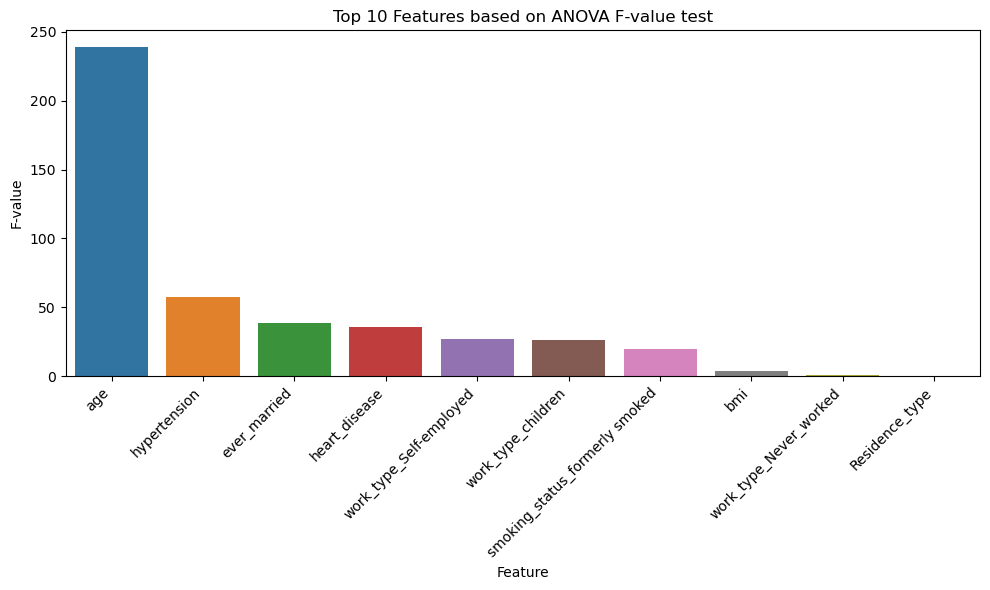

In [40]:

# Encode categorical features
X_encoded = pd.get_dummies(X, drop_first=True)

# Fill missing numeric values with mean
X_encoded = X_encoded.fillna(X_encoded.mean())

# Perform ANOVA F-value test
f_values, p_values = f_classif(X_encoded, y)

# Create a DataFrame with feature names and F-values
f_df = pd.DataFrame({'feature': X_encoded.columns, 'F-value': f_values})

# Sort by F-value and select top 10 features
top_features = f_df.sort_values(by='F-value', ascending=False).head(10)

# Plot top 10 features
plt.figure(figsize=(10, 6))
sns.barplot(x='feature', y='F-value', data=top_features)
plt.title('Top 10 Features based on ANOVA F-value test')
plt.xlabel('Feature')
plt.ylabel('F-value')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [41]:

# Encode categorical features
X_encoded = pd.get_dummies(X, drop_first=True)

# Fill missing numeric values
X_encoded = X_encoded.fillna(X_encoded.mean())

# Split into train/test
x_train, x_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42, stratify=y)

# Select top 10 features (from your list)
top_features = [
    'age',
    'hypertension',
    'heart_disease',
    'avg_glucose_level',
    'bmi',
    'gender',
    'ever_married',
    'work_type_Private',
    'smoking_status_formerly smoked',
    'smoking_status_never smoked'
]

# Keep only top features
x_train = x_train[top_features]
x_test = x_test[top_features]

# Standardize features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Convert back to DataFrame
x_train = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test = pd.DataFrame(x_test_scaled, columns=x_test.columns)

# Display
display(x_train.head())
display(x_test.head())



,age,hypertension,heart_disease,avg_glucose_level,bmi,gender,ever_married,work_type_Private,smoking_status_formerly smoked,smoking_status_never smoked
0,0.493115,-0.278286,-0.206208,-0.341496,1.123746,-0.830935,0.781328,0.869272,-0.44246,-0.746679
1,0.139345,-0.278286,-0.206208,-0.407932,-0.487533,-0.830935,0.781328,-1.150388,-0.44246,1.339263
2,-0.877742,-0.278286,-0.206208,-0.063436,0.187670,-0.830935,-1.279873,0.869272,-0.44246,-0.746679
3,-0.302866,-0.278286,-0.206208,-0.193227,1.645494,-0.830935,-1.279873,0.869272,-0.44246,-0.746679
4,-1.585281,-0.278286,-0.206208,0.597397,0.064905,-0.830935,-1.279873,-1.150388,-0.44246,-0.746679


,age,hypertension,heart_disease,avg_glucose_level,bmi,gender,ever_married,work_type_Private,smoking_status_formerly smoked,smoking_status_never smoked
0,0.493115,-0.278286,-0.206208,-1.023008,0.985637,1.203463,0.781328,0.869272,-0.44246,1.339263
1,0.625778,-0.278286,-0.206208,0.869298,0.908909,1.203463,0.781328,-1.150388,-0.44246,1.339263
2,1.465981,-0.278286,-0.206208,-1.312068,-0.288041,1.203463,0.781328,-1.150388,-0.44246,-0.746679
3,0.625778,-0.278286,-0.206208,-0.705791,0.264397,-0.830935,0.781328,-1.150388,-0.44246,-0.746679
4,-1.231511,-0.278286,-0.206208,-0.136031,0.003523,-0.830935,-1.279873,-1.150388,-0.44246,-0.746679


In [42]:
# Checking the shape of the train and test datasets
print("The shape of x_train_scaled is: ", x_train_scaled.shape)
print("The shape of x_test_scaled is: ", x_test_scaled.shape)
print("The shape of y_train is: ", y_train.shape)
print("The shape of y_test is: ", y_test.shape)


The shape of x_train_scaled is:  (3506, 10)
The shape of x_test_scaled is:  (877, 10)
The shape of y_train is:  (3506,)
The shape of y_test is:  (877,)


# MODEL IMPLEMENTATION
This is basically preparing the models.

In [71]:
# class_weight='balanced' adjusts for class imbalance
lr = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)

# Fit the model
lr.fit(x_train_scaled, y_train)


LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

Train Accuracy: 0.7365459882583171
Test Accuracy: 0.7524461839530333
Confusion Matrix:
 [[729 243]
 [ 10  40]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.75      0.85       972
           1       0.14      0.80      0.24        50

    accuracy                           0.75      1022
   macro avg       0.56      0.78      0.55      1022
weighted avg       0.95      0.75      0.82      1022



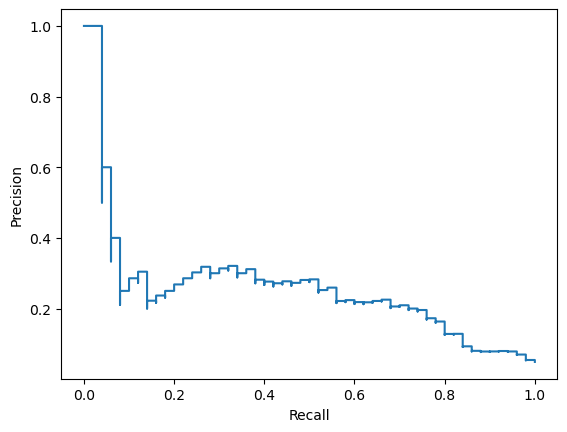

In [72]:
y_pred = lr.predict(x_test_scaled)
y_scores = lr.predict_proba(x_test_scaled)[:, 1]

print("Train Accuracy:", lr.score(x_train_scaled, y_train))
print("Test Accuracy:", lr.score(x_test_scaled, y_test))

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()


In [73]:
# Stratified K-Fold ensures class balance in each fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(lr, X, y, cv=skf, scoring='accuracy')

print("Cross-validated Accuracy scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())


Cross-validated Accuracy scores: [0.74657534 0.72896282 0.74559687 0.74657534 0.72896282]
Mean Accuracy: 0.7393346379647749


Train Accuracy: 0.7365459882583171
Test Accuracy: 0.7524461839530333

Confusion Matrix:
 [[729 243]
 [ 10  40]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.75      0.85       972
           1       0.14      0.80      0.24        50

    accuracy                           0.75      1022
   macro avg       0.56      0.78      0.55      1022
weighted avg       0.95      0.75      0.82      1022

Cross-validated Accuracy scores: [0.69193154 0.74938875 0.74572127 0.74541004 0.75887393]
Mean Accuracy: 0.7382651061040901


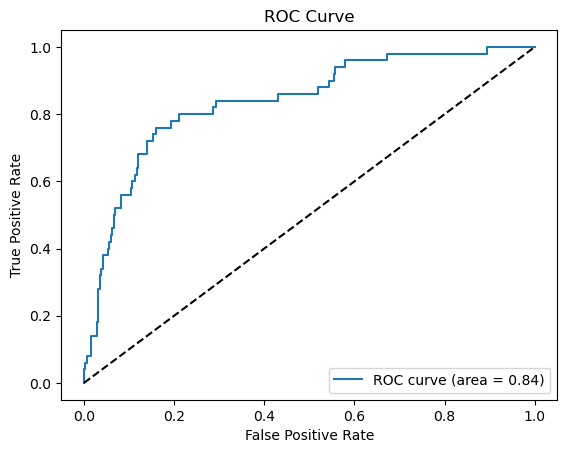

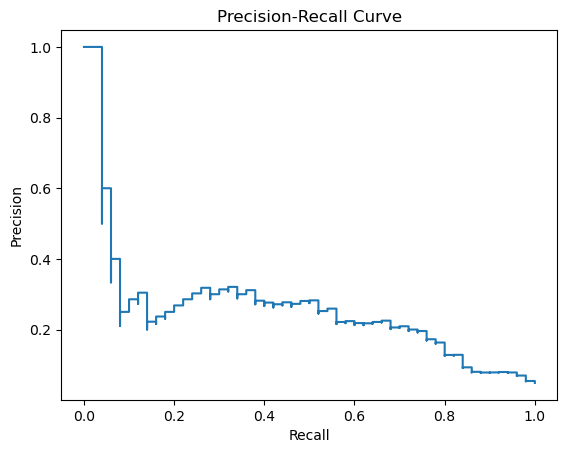


Top features by importance:
age: 1.7669
avg_glucose_level: 0.1996
hypertension: 0.1622
heart_disease: 0.0741
Residence_type: 0.0727
ever_married: -0.0629
bmi: 0.0509
work_type: -0.0311
gender: -0.0296
smoking_status: 0.0220


In [74]:

# 1. Predictions
y_pred = lr.predict(x_test_scaled)
y_scores = lr.predict_proba(x_test_scaled)[:, 1]  # Probabilities for class 1

# 2. Train and test accuracy
print("Train Accuracy:", lr.score(x_train_scaled, y_train))
print("Test Accuracy:", lr.score(x_test_scaled, y_test))

# 3. Confusion matrix and classification report
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 4. Cross-validated accuracy (5-fold)
cv_scores = cross_val_score(lr, x_train_scaled, y_train, cv=5, scoring='accuracy')
print("Cross-validated Accuracy scores:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))

# 5. ROC-AUC curve
roc_auc = roc_auc_score(y_test, y_scores)
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# 6. Precision-Recall curve
precision, recall, pr_thresholds = precision_recall_curve(y_test, y_scores)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.title('Precision-Recall Curve')
plt.show()

# 7. Feature importance (coefficients)
coefficients = lr.coef_[0]
feature_names = X.columns  # or your feature list
feature_importance = sorted(zip(feature_names, coefficients), key=lambda x: abs(x[1]), reverse=True)
print("\nTop features by importance:")
for feat, coef in feature_importance:
    print(f"{feat}: {coef:.4f}")


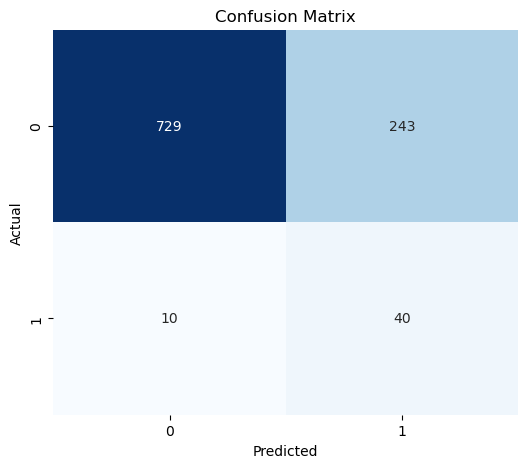

In [76]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)  # or y_pred_threshold if using custom threshold

# Plot confusion matrix as heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Train Accuracy: 0.7365459882583171
Test Accuracy: 0.7524461839530333

Confusion Matrix:
 [[729 243]
 [ 10  40]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.75      0.85       972
           1       0.14      0.80      0.24        50

    accuracy                           0.75      1022
   macro avg       0.56      0.78      0.55      1022
weighted avg       0.95      0.75      0.82      1022

Cross-validated Accuracy scores: [0.69193154 0.74938875 0.74572127 0.74541004 0.75887393]
Mean Accuracy: 0.7382651061040901


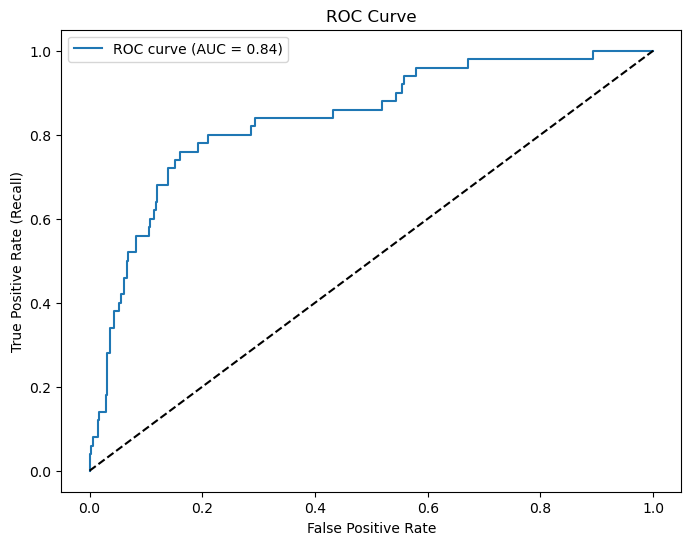

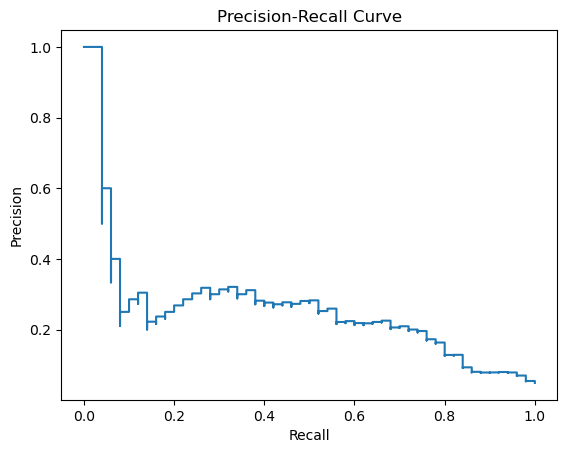


Classification report at threshold 0.3:

              precision    recall  f1-score   support

           0       0.99      0.59      0.74       972
           1       0.10      0.84      0.17        50

    accuracy                           0.60      1022
   macro avg       0.54      0.71      0.45      1022
weighted avg       0.94      0.60      0.71      1022


Top features by importance:
              Feature  Coefficient
1  avg_glucose_level     1.766863
7          work_type     0.199601
2       hypertension     0.162192
3      heart_disease     0.074113
6                bmi     0.072668
4     Residence_type    -0.062907
8             gender     0.050945
5       ever_married    -0.031056
0                age    -0.029581
9     smoking_status     0.022045


In [75]:

# -------------------------------
# 1️⃣ Predictions and Probabilities
# -------------------------------
# Predict classes and probabilities
y_pred = lr.predict(x_test_scaled)
y_scores = lr.predict_proba(x_test_scaled)[:, 1]  # Probability of class 1

# -------------------------------
# 2️⃣ Standard Evaluation
# -------------------------------
print("Train Accuracy:", lr.score(x_train_scaled, y_train))
print("Test Accuracy:", lr.score(x_test_scaled, y_test))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# -------------------------------
# 3️⃣ Cross-validated Accuracy
# -------------------------------
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(lr, x_train_scaled, y_train, cv=5, scoring='accuracy')
print("Cross-validated Accuracy scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

# -------------------------------
# 4️⃣ ROC Curve & AUC
# -------------------------------
fpr, tpr, roc_thresholds = roc_curve(y_test, y_scores)
auc_score = roc_auc_score(y_test, y_scores)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.legend()
plt.show()

# -------------------------------
# 5️⃣ Precision-Recall Curve
# -------------------------------
precision, recall, pr_thresholds = precision_recall_curve(y_test, y_scores)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.title('Precision-Recall Curve')
plt.show()

# -------------------------------
# 6️⃣ Threshold Tuning (Optional)
# -------------------------------
# Example: Choosing threshold for higher recall
best_threshold = 0.3
y_pred_threshold = (y_scores >= best_threshold).astype(int)
print(f"\nClassification report at threshold {best_threshold}:\n")
print(classification_report(y_test, y_pred_threshold))

# -------------------------------
# 7️⃣ Feature Importance (Coefficients)
# -------------------------------
feature_names = [  # Replace with your top features
    'age','avg_glucose_level','hypertension','heart_disease',
    'Residence_type','ever_married','bmi','work_type','gender','smoking_status'
]
coefficients = lr.coef_[0]

feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', key=abs, ascending=False)

print("\nTop features by importance:\n", feature_importance)


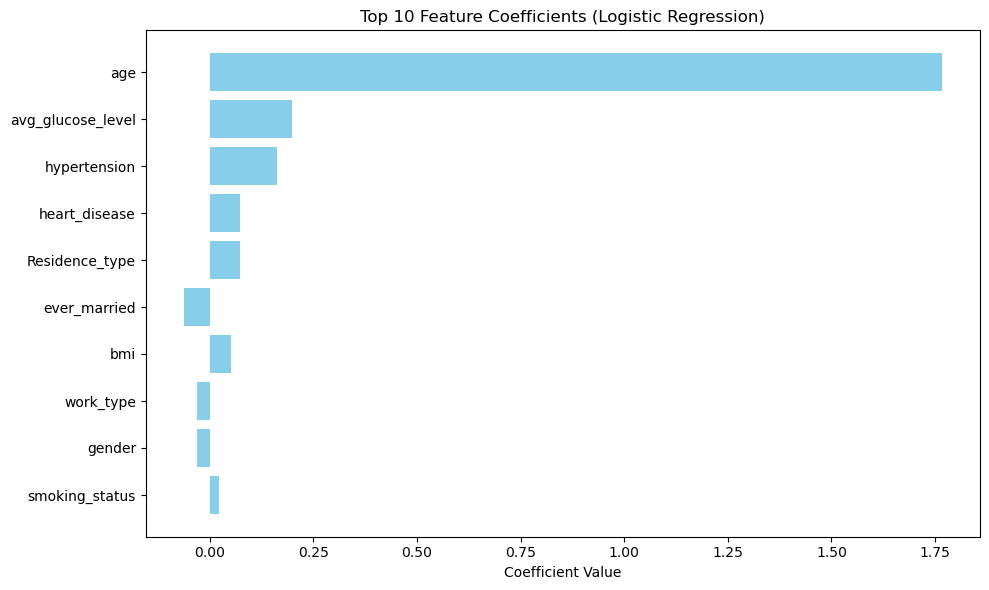

In [79]:


# Get feature names
feature_names = X.columns

# Get absolute values of coefficients from trained Logistic Regression
coefficients = lr.coef_[0]
abs_coefficients = np.abs(coefficients)

# Get indices of top 10 features
indices = np.argsort(abs_coefficients)[-10:]

# Plot horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(range(len(indices)), coefficients[indices], color='skyblue')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Coefficient Value')
plt.title('Top 10 Feature Coefficients (Logistic Regression)')
plt.tight_layout()
plt.show()



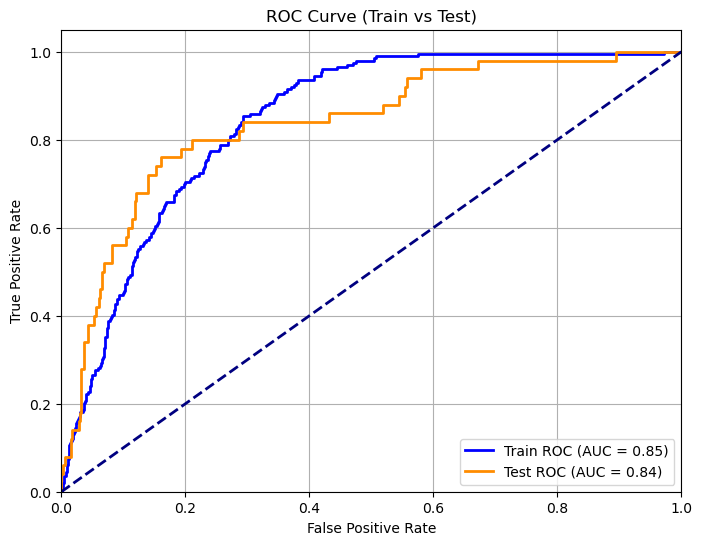

In [84]:


# Predict probabilities for both train and test sets
y_train_scores = lr.predict_proba(x_train_scaled)[:, 1]
y_test_scores = lr.predict_proba(x_test_scaled)[:, 1]

# Compute ROC curves
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_scores)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_scores)

# Compute AUC
roc_auc_train = auc(fpr_train, tpr_train)
roc_auc_test = auc(fpr_test, tpr_test)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label=f'Train ROC (AUC = {roc_auc_train:.2f})')
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label=f'Test ROC (AUC = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Train vs Test)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [85]:
import joblib

# Save the Logistic Regression model to disk
joblib.dump(lr, 'stroke_logistic_model.pkl')

print("Model saved successfully as 'stroke_logistic_model.pkl'")


Model saved successfully as 'stroke_logistic_model.pkl'
